<a href="https://colab.research.google.com/github/FatemehAbediK/machine-learning/blob/main/classification_models_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#classification

data set

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , log_loss


In [3]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [4]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
x=df.drop(columns=['target'] , axis=0)
y=df['target']

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

In [9]:
x_train.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
346,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
361,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.024240,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.1667,0.12120,0.05614,0.2637,0.06658
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.114400,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.5329,0.42510,0.19410,0.2818,0.10050
463,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,0.05859,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
48,12.05,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,13.76,20.70,89.88,582.6,0.1494,0.2156,0.30500,0.06548,0.2747,0.08301


In [10]:
x_test.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.1402,0.1055,0.06499,0.2894,0.07664
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216
379,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.25240,0.4154,0.14030
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
30,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,0.06197,...,23.15,34.01,160.50,1670.0,0.1491,0.4257,0.6133,0.18480,0.3444,0.09782


In [11]:
print(type(x_train))
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
#test set is series----let's turn it into data frame:

#x_test=pd.DataFrame(x_test)
#y_test=pd.DataFrame(y_test)

In [14]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

logistic regression

In [15]:
log=LogisticRegression()
log.fit(x_train_scaler , y_train)
y_pred = log.predict(x_test_scaler)

acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)
log_loss=log_loss(y_test , y_pred)



In [16]:
print(f'accuracy score' , acc)
print(f'confusion_matrix' , cm)
print(f'classification_report' ,c_report)
print(f'log loss' , log_loss)


accuracy score 0.9707602339181286
confusion_matrix [[ 66   4]
 [  1 100]]
classification_report               precision    recall  f1-score   support

           0       0.99      0.94      0.96        70
           1       0.96      0.99      0.98       101

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

log loss 1.053907993833835


KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

In [18]:
knn=KNeighborsClassifier(n_neighbors=2,weights='distance' , metric='minkowski' , p=2)
knn.fit(x_train_scaler , y_train)
y_pred = knn.predict(x_test_scaler)

acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)
log_loss_value=log_loss(y_test , y_pred)

In [19]:
print(f'accuracy score' , acc)
print(f'confusion_matrix' , cm)
print(f'classification_report' ,c_report)
print(f'log loss' , log_loss_value)

accuracy score 0.9590643274853801
confusion_matrix [[ 63   7]
 [  0 101]]
classification_report               precision    recall  f1-score   support

           0       1.00      0.90      0.95        70
           1       0.94      1.00      0.97       101

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

log loss 1.475471191367369


elbow method ---for best k

In [20]:
error=[]
for k in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=k,weights='distance' , metric='minkowski' , p=2)
  knn.fit(x_train_scaler , y_train)
  y_pred=knn.predict(x_test_scaler)
  test_error=1-accuracy_score(y_test , y_pred)
  error.append(test_error)

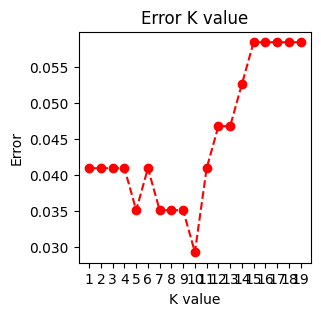

In [21]:
plt.figure(figsize=(3,3))
plt.plot(range(1,20),error,color='red',linestyle='dashed',marker='o')
plt.xticks(range(1,20))
plt.xlabel('K value')
plt.ylabel('Error')
plt.title('Error K value')
plt.show()

Grid search---for best k

a pipe line:estimator
then scaler and knn algorithm

In [22]:
scaler=StandardScaler()
knn=KNeighborsClassifier()
knn.get_params().keys()
pipe=Pipeline([('scaler',scaler),('knn',knn)])

k_v=list(range(1,20))
p_grid={'knn__n_neighbors':k_v,
        'knn__weights':['uniform','distance'],
        'knn__metric':['minkowski','euclidean','manhattan']}

cv_grid=GridSearchCV(pipe,param_grid=p_grid,cv=5,scoring='accuracy')
cv_grid.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [23]:
cv_grid_best=cv_grid.best_estimator_
cv_grid_best.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn',
   KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 4,
 'knn__p': 2,
 'knn__weights': 'distance'}

Naive Bayes

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , log_loss

In [25]:
bayes=GaussianNB()
bayes.fit(x_train_scaler , y_train)
y_pred = bayes.predict(x_test_scaler)

acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)
log_loss=log_loss(y_test , y_pred)

In [26]:
print(f'accuracy score' , acc)
print(f'confusion_matrix' , cm)
print(f'classification_report' ,c_report)
print(f'log loss' , log_loss)

accuracy score 0.9298245614035088
confusion_matrix [[61  9]
 [ 3 98]]
classification_report               precision    recall  f1-score   support

           0       0.95      0.87      0.91        70
           1       0.92      0.97      0.94       101

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171

log loss 2.5293791852012038


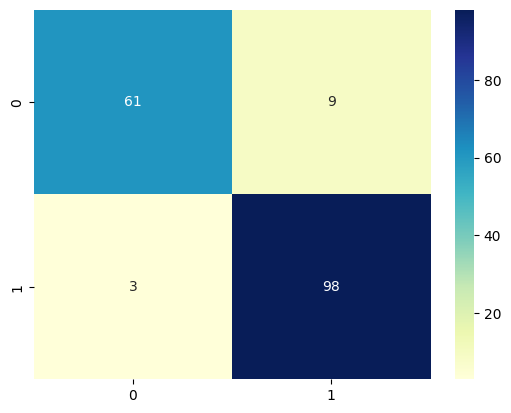

In [27]:
sns.heatmap(cm,annot=True,cmap='YlGnBu',fmt='d')
plt.show()


#SVM

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , log_loss

from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [29]:
kfold=KFold(n_splits=5,shuffle=True)

svm=SVC()
svm.fit(x_train , y_train)

y_pred = svm.predict(x_test_scaler)

acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)
log_loss=log_loss(y_test , y_pred)

In [30]:
print(f'accuracy score' , acc)
print(f'confusion_matrix' , cm)
print(f'classification_report' ,c_report)
print(f'log loss' , log_loss)

accuracy score 0.5906432748538012
confusion_matrix [[  0  70]
 [  0 101]]
classification_report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.59      1.00      0.74       101

    accuracy                           0.59       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.35      0.59      0.44       171

log loss 14.75471191367369


C & kernel

In [31]:
'''
svm.fit(x_train , y_train)

y_pred = svm.predict(x_test_scaler)
acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)

score=cross_val_score(svm,x_train , y_train,cv=KFold)

#comparison---overfitting
svc.score(x_train , y_train)
svc.score(x_test , y_test)
'''

'\nsvm.fit(x_train , y_train)\n\ny_pred = svm.predict(x_test_scaler)\nacc=accuracy_score(y_test , y_pred)\ncm=confusion_matrix(y_test , y_pred)\nc_report=classification_report(y_test , y_pred)\n\nscore=cross_val_score(svm,x_train , y_train,cv=KFold)\n\n#comparison---overfitting\nsvc.score(x_train , y_train)\nsvc.score(x_test , y_test)\n'

In [32]:
linear_svm=SVC(C=100,kernel='linear')
poly_svm=SVC(C=1,kernel='poly')
Rbf_svm=SVC(C=10,kernel='rbf',gamma=0.2)
sig_svm=SVC(C=1,kernel='sigmoid')


In [33]:
linear_svm.fit(x_train , y_train)

y_pred = linear_svm.predict(x_test_scaler)
acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(linear_svm, x_train, y_train, cv=kf)


#comparison---overfitting
print(linear_svm.score(x_train , y_train))
print(linear_svm.score(x_test , y_test))


0.9748743718592965
0.9590643274853801


In [34]:
poly_svm.fit(x_train , y_train)

y_pred = poly_svm.predict(x_test_scaler)
acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(poly_svm, x_train, y_train, cv=kf)


#comparison---overfitting
print(poly_svm.score(x_train , y_train))
print(poly_svm.score(x_test , y_test))

0.914572864321608
0.8888888888888888


gridsearch cv

In [37]:
scaler=StandardScaler()
svc=SVC()
svc.get_params().keys()
pipe=Pipeline([('scaler',scaler),('svc',svc)])

params=[{'svc__C' :[1,10,100] , 'svc__kernel':["linear"]},
        {'svc__C' :[1,10,100] , 'svc__kernel':["rbf"] , 'svc__gamma' :[0.2 , 0.4 , 0.6 , 0.8]} ,
        {'svc__C' :[1,10,100] , 'svc__kernel':["poly"] , 'svc__gamma' :[0.2 , 0.4 , 0.6 , 0.8] , 'svc__degree':[2,3,4]}
        ]

grid_search=GridSearchCV(pipe,param_grid=params,cv=5,scoring='accuracy')
grid_search.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [1, 10, 100], 'svc__kernel': ['linear']},
                         {'svc__C': [1, 10, 100],
                          'svc__gamma': [0.2, 0.4, 0.6, 0.8],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [1, 10, 100], 'svc__degree': [2, 3, 4],
                          'svc__gamma': [0.2, 0.4, 0.6, 0.8],
                          'svc__kernel': ['poly']}],
             scoring='accuracy')

In [39]:
print(grid_search.best_params_)

{'svc__C': 1, 'svc__kernel': 'linear'}


In [42]:
cv_grid_best=grid_search.best_estimator_
print(cv_grid_best)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])


DecisionTree & RandomForest

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , log_loss

In [44]:
dt=DecisionTreeClassifier()
dt.fit(x_train , y_train)

y_pred=dt.predict(x_test)

acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)

In [47]:
print(f'accuracy_score: {acc}')
print(f'confusion_matrix: \n{cm}')
print(f'classification_report: \n{c_report}')

accuracy_score: 0.9239766081871345
confusion_matrix: 
[[61  9]
 [ 4 97]]
classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        70
           1       0.92      0.96      0.94       101

    accuracy                           0.92       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



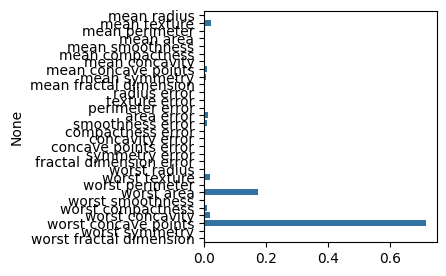

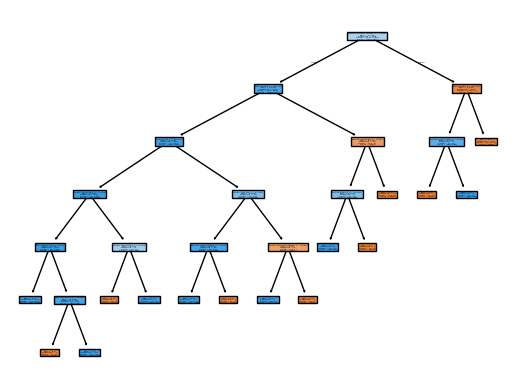

In [50]:
pd.DataFrame(dt.feature_importances_,index=x.columns,
              columns=['importance']).sort_values('importance',ascending=False)

plt.figure(figsize=(3,3))
sns.barplot(x=dt.feature_importances_,y=x.columns)
plt.show();
plot_tree(dt,filled=True,feature_names=list(x.columns), class_names=['died' , 'survived'])
plt.show();

In [51]:
ent_dt=DecisionTreeClassifier(criterion='entropy')
ent_dt.fit(x_train , y_train)

y_pred=ent_dt.predict(x_test)

acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)


In [54]:
print(f'accuracy_score: {acc}')
print(f'confusion_matrix: \n{cm}')
print(f'classification_report: \n{c_report}')

accuracy_score: 0.9005847953216374
confusion_matrix: 
[[58 12]
 [ 5 96]]
classification_report: 
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        70
           1       0.89      0.95      0.92       101

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.90      0.90      0.90       171



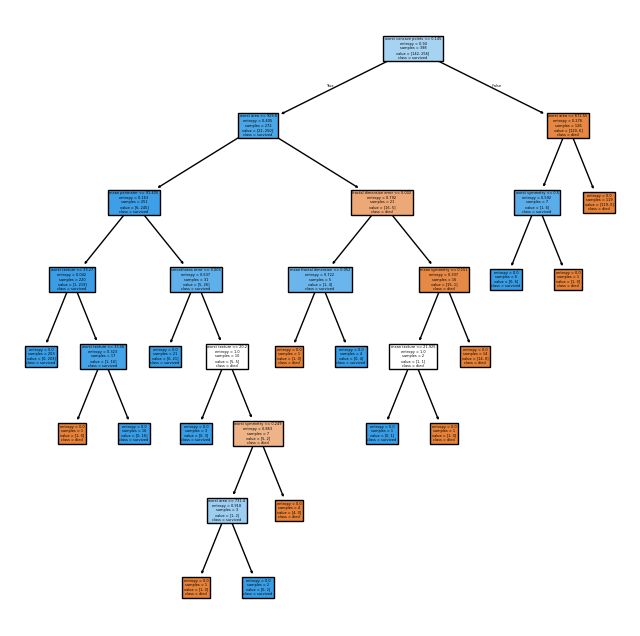

In [56]:
plt.figure(figsize=(8,8))
plot_tree(ent_dt,filled=True,feature_names=list(x.columns), class_names=['died' , 'survived'])
plt.show();

rf

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train , y_train)

y_pred=rf.predict(x_test)

acc=accuracy_score(y_test , y_pred)
cm=confusion_matrix(y_test , y_pred)
c_report=classification_report(y_test , y_pred)

In [60]:
print(f'accuracy_score: {acc}')
print(f'confusion_matrix: \n{cm}')
print(f'classification_report: \n{c_report}')

accuracy_score: 0.9415204678362573
confusion_matrix: 
[[62  8]
 [ 2 99]]
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        70
           1       0.93      0.98      0.95       101

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



for best params-preprunning

In [ ]:
"""
scaler=StandardScaler()

dt_model=DecisionTreeClassifier()
dt_model.get_params().keys()


pipe=Pipeline([('scaler',scaler),('dt',dt_model)])

grid_param={'dt__criterion':["gini" , "entropy"],
            'dt__splitter':["best" , "random"],
            'dt__max_depth':range(2,50),
            'dt__min_samples_leaf':range(2,15),
            'dt__min_samples_split':range(2,20)}

dt_grid=GridSearchCV(pipe,param_grid=grid_param,cv=5,scoring='accuracy')
dt_grid.fit(x_train , y_train)


print(dt_grid.best_params_)
print(dt_grid.best_score_)

y_pred_dt_grid=dt_grid.predict(x_test)
print(classification_report(y_test,y_pred_dt_grid))

"""